## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [182]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [183]:
#read ab_data.csv data
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [184]:
#get the number of rows 
df.shape[0]

294478

c. The number of unique users in the dataset.

In [185]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [186]:
#use mean to get the proportion of users converted.
(df['converted' ] == 1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [187]:
#get the number of rows [0] where treatment group user lands by mistake on old_page 
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [188]:
#check missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

#### There is no values missing.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [189]:
#Dropping mismatching rows
df2=df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)

In [190]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [191]:
#numbers of unique user_ids from df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [192]:
#check for duplicates in user_id
df2.user_id.duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [193]:
#inspect duplicates in userid
df2[df2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [194]:
# delete one of the duplicated rows which is timestamp== '2017-01-09 05:37:58.781806'
i = df2[((df2.user_id == 773192) & ( df2.timestamp== '2017-01-09 05:37:58.781806'))].index
df2.drop(i)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [195]:
# we calculate mean to get the probability of an individual converting 
df2['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [196]:
#using group by to get the mean converted users for each group 
df2_control = df2.groupby('group').mean()
df2_control

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.618446,0.118807


#### From the table above shows that the probability they converted an individual in control group is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

#### From the same table above (b) shows that the probability they converted an individual in treatment group is 0.118807

d. What is the probability that an individual received the new page?

In [197]:
#count all users by rows [0]
all_users = df2.shape[0]
#count the number of new users with new page 
new_user = len(df2.query("group == 'treatment'"))
#calucate probability that an individual received the new page which is the mean 
probability_new=new_user/all_users
probability_new

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### There is insufficient evidence to prove that the new page leads to more conversions. The probability conversions for the control is 0.120386 and the treatment by 0.118807 , we can see that the difference between both groups is very tiny.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0:P_{new}−P_{old}≤ 0$$
$$ H_1:P_{new}−P_{old}> 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [198]:
#calucate the mean to get the convert rate
p_new = np.sum(df2['converted'])/len(df2['converted'])
p_new 

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [199]:
#calucate the mean to get the convert rate
p_old = np.sum(df2['converted'])/len(df2['converted'])
p_old

0.11959667567149027

c. What is $n_{new}$?

In [200]:
#get the number of rows [0] where treatment group user land on new_page 
n_new = df2[(df2['group'] == 'treatment')].shape[0]
n_new

145311

d. What is $n_{old}$?

In [201]:
#get the number of rows [0] where control group user lands on old_page 
n_old = df2[(df2['group'] == 'control')].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [202]:
#Simulate n_new transactions with a convertion rate of  p_new under the null and store in new_page_converted
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [203]:
#Simulate n_old transactions with a convertion rate of  p_pld under the null and store in old_page_converted
old_page_converted = np.random.choice([1, 0],n_old,p=[p_old, (1-p_old)])
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [204]:
#get the difference between p_new and p_old.
𝑝𝑛𝑒𝑤_𝑝𝑜𝑙𝑑 = new_page_converted.mean() - old_page_converted.mean()
𝑝𝑛𝑒𝑤_𝑝𝑜𝑙𝑑 

0.7622726530275901

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [221]:
# Simulate 10,000 p_new - p_old values with random choice 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0],n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0],n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

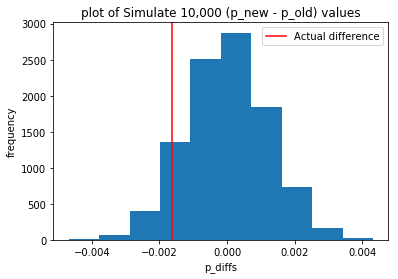

In [222]:
#plot p_diffs which is simulate 10,000 (p_new - p_old) values
plt.hist(p_diffs);
plt.xlabel('p_diffs');
plt.ylabel('frequency');
plt.title('plot of Simulate 10,000 (p_new - p_old) values');
plt.axvline(diff, color = 'red', label = "Actual difference");
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [223]:
# proportion of p_diffs greater than the actual difference observed in ab_data.csv
(diff < p_diffs).mean()

0.9145

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

 <b><ul><li> This  value is p-value which is the probability of observing the statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.</li>


<li> here we can tell that the proportion of the conversion rate differenc was greater than the actual observed difference which actully true for null hypothesis. </li>
    
<li>The p-value is large by 0.9077 than the type one error 0.05 (5%),that means we fail to reject the null hypothesis , so there is no diffrence between the observing rate in the old and new page ,so no need to convert to the new page.</li></ul></b>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [224]:
import statsmodels.api as sm
convert_old = df2.query('converted == 1 and landing_page == "old_page"').count()[0]
convert_new = df2.query('converted == 1 and landing_page == "new_page"').count()[0]
n_old = df2.query('landing_page == "old_page" ').count()[0]
n_new = df2.query('landing_page == "new_page" ').count()[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [225]:
#calculate the z_score and p-value.
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'larger')
print("z_score:",z_score)
print("p_value:",p_value)

z_score: 1.3116075339133115
p_value: 0.09482629485940902


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### The z-score of 1.31 lower than the critical value of 1.96, we fail to reject the null hypothes.There was not a significant difference between the conversion rates of the new page and the conversion rates of the old page .

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [231]:
#creating intercept column
df2['intercept']=1
#create a dummy variable column
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [232]:
#import statsmodel
import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [233]:
#fit logistic regression and print the result 
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 May 2019   Pseudo R-squ.:               8.085e-06
Time:                        00:40:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<b>The p-value associated with ab_page is 0.9077 and the p-value in Part II was 0.190,that means we fail to reject the null hyphothesis because of the two p-values are greater than type one error 0.05 (5%).
The null and alternative hypotheses associated with regression model:
$$ H_0:P_{new}−P_{old}=0$$
$$ H_1:P_{new}−P_{old}\neq 0$$
The difference between the hypothesis is in the first we analyze if the old page is good enough unless the new page proof to be greater than type one error 0.05 (5%).
But in the hypotheses associated with the regression model, we analyze in a two-sided way whether or the page is worse or better,either way, the difference is significant.<b>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [246]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [247]:
#merge country column with ab_page dataset based to the user_id 
df3 = df2.merge(countries_df, on='user_id', how='inner')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,US


In [248]:
df3['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [249]:
### Create the necessary dummy variables
df3[['US', 'CA', 'UK']] = pd.get_dummies(df3['country'])
df3 = df3.drop(['country', 'US'], axis = 1)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,0,1


In [250]:
### Fit linear model and obtain the results
df['intercept'] = 1
logit2 = sm.Logit(df3['converted'], df3[['intercept','CA','UK']])
results2 = logit2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        00:48:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
CA             0.0507      0.028      1.786      0.074      -0.005       0.106
UK             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [251]:
# Adding ab_page
logit_ab = sm.Logit(df3['converted'], df3[['intercept','CA','UK','ab_page']])
results_ab = logit_ab.fit()
results_ab.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 May 2019   Pseudo R-squ.:               2.324e-05
Time:                        00:48:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
CA             0.0506      0.028      1.784      0.074      -0.005       0.106
UK             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [252]:
# Creating new columns for interaction between page and country
df3['CA_ab_page']=df3['ab_page']*df3['CA']
df3['UK_ab_page']=df3['ab_page']*df3['UK']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,CA,UK,CA_ab_page,UK_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,0,1,0,0


In [254]:
# Fit to Linear Model And Obtain the Results
log = sm.Logit(df3['converted'],df3[['intercept','CA','UK','ab_page','CA_ab_page','UK_ab_page']])
result = log.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 May 2019   Pseudo R-squ.:               3.483e-05
Time:                        00:51:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
CA             0.0118      0.040      0.296      0.767      -0.066       0.090
UK             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
CA_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
UK_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

From the result above we see that the p-value is greater than the type one error 0.05 , so we fail to reject the null hyphothesis .

<a id='conclusions'></a>
## Conclusions





In this project the company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. our goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

<br>
I used the A/B test with z-test and logistic regression models to get the right decision , after cleainng the dataset we had only one duplicated row So, thats problem did not affect the results.
<br>

In the A/B test with z-test , the p-value is large by 0.9077 than the type one error 0.05 (5%),and the z-score of 1.31 lower than the critical value of 1.96 ,that means we fail to reject the null hypothesis , so there is no diffrence between the observing rate in the old and new page ,so no need to convert to the new page.

<br>
In the logistic regression the p-value associated with ab_page is 0.9077 and the p-value in Part II was 0.190,that means we fail to reject the null hyphothesis because of the two p-values are greater than type one error 0.05 (5%). 
even after using statsmodels to fit the regression model with the country factor , I didn't see a big difference, because the time period for this experiment is very short to test the data and make decisions, so I recommended to redo this test after the individuals take their time exploring the new page .